# Імпортуємо модумі і бібліотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
from keras.preprocessing.image import ImageDataGenerator

In [2]:
CATEGORIES = ['cat','dog']

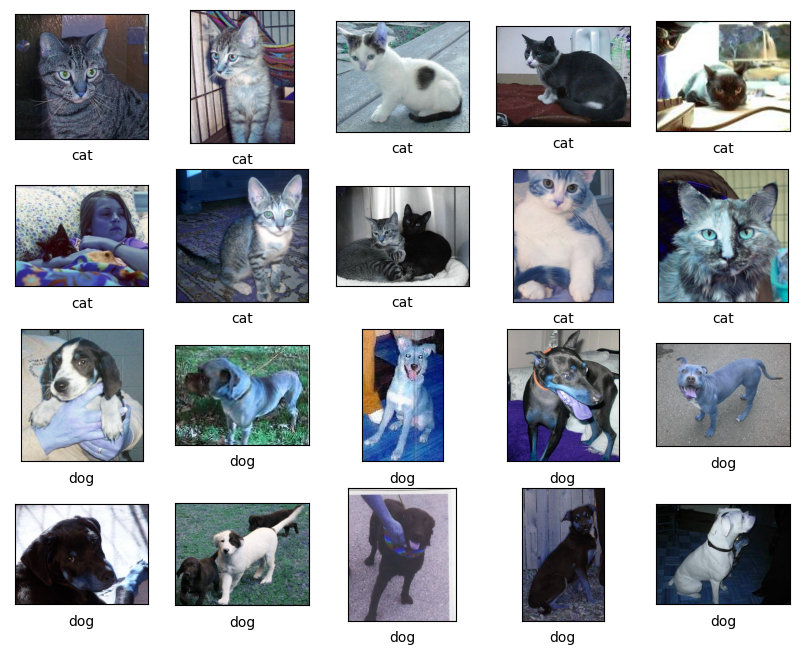

In [3]:
plt.figure(figsize=(10,10))
for i in range(20):
    if i <10:
        j=0
        img_arr=cv2.imread(r'D:\Study\Intelligent_technologies\cat_dog_image\dataset\training_set\cats\cat.'+ str(i+1) + '.jpg')
    else:
        j=1
        img_arr=cv2.imread(r'D:\Study\Intelligent_technologies\cat_dog_image\dataset\training_set\dogs\dog.'+ str(i) + '.jpg')
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img_arr, cmap=plt.cm.binary)
    plt.xlabel(CATEGORIES[j])

In [4]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(r'D:\Study\Intelligent_technologies\cat_dog_image\dataset\training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r'D:\Study\Intelligent_technologies\cat_dog_image\dataset\test_set',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [6]:
cnn = tf.keras.models.Sequential()

In [7]:
cnn.add(tf.keras.layers.Conv2D(
    filters= 32,
    kernel_size = 3,
    activation = 'relu',
    input_shape = [64,64,3]
))

In [8]:
cnn.add(tf.keras.layers.MaxPool2D(
    pool_size = 2,
    strides = 2
))

In [9]:
cnn.add(tf.keras.layers.Conv2D(
    filters= 32,
    kernel_size = 3,
    activation = 'relu',
))
cnn.add(tf.keras.layers.MaxPool2D(
    pool_size = 2,
    strides = 2
))

In [10]:
cnn.add(tf.keras.layers.Flatten())

In [11]:
cnn.add(tf.keras.layers.Dense(
    units=128, 
    activation='relu'
))

In [12]:
cnn.add(tf.keras.layers.Dense(
    units=1, 
    activation='sigmoid'
))

In [13]:
cnn.compile(
    optimizer = 'adam', 
    loss = 'binary_crossentropy', 
    metrics = ['accuracy']
    )

In [14]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [17]:
cnn.fit(
    x = training_set, 
    validation_data = test_set, 
    epochs = 5
    )

Epoch 1/5
250/250 [==============================] - 35s 140ms/step - loss: 0.4146 - accuracy: 0.8075 - val_loss: 0.4629 - val_accuracy: 0.7765
Epoch 2/5
250/250 [==============================] - 32s 129ms/step - loss: 0.4056 - accuracy: 0.8142 - val_loss: 0.4721 - val_accuracy: 0.7915
Epoch 3/5
250/250 [==============================] - 33s 130ms/step - loss: 0.3952 - accuracy: 0.8184 - val_loss: 0.4721 - val_accuracy: 0.7765
Epoch 4/5
250/250 [==============================] - 32s 129ms/step - loss: 0.3767 - accuracy: 0.8285 - val_loss: 0.4439 - val_accuracy: 0.8030
Epoch 5/5
250/250 [==============================] - 32s 129ms/step - loss: 0.3694 - accuracy: 0.8322 - val_loss: 0.4830 - val_accuracy: 0.8015


In [18]:
predictions = cnn.predict(training_set)

250/250 [==============================] - 14s 56ms/step


In [19]:
predictions

array([[0.9822021 ],
       [0.01782654],
       [0.01852828],
       ...,
       [0.77998435],
       [0.9989671 ],
       [0.9617378 ]], dtype=float32)

In [20]:
def show_prediction(img_prediction):
    test_image = tf.keras.utils.load_img(img_prediction, target_size = (64, 64))
    test_image = tf.keras.utils.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image)
    training_set.class_indices
    if result[0][0] == 1:
        prediction = 'dog'
    else:
        prediction = 'cat'
    img_show=cv2.imread(img_prediction)
    plt.figure(figsize=(5,5))
    plt.imshow(img_show)
    plt.title(f'{prediction} {result}')

1/1 [==============================] - 0s 16ms/step


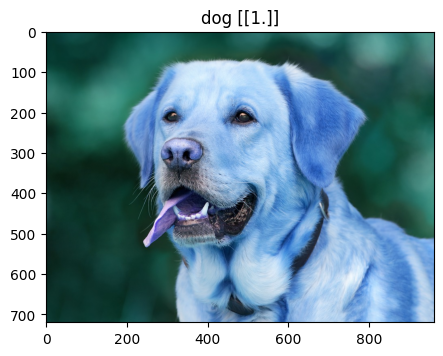

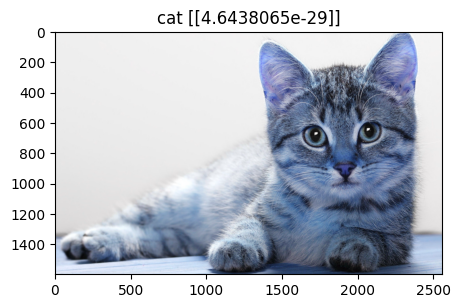

In [22]:
for i in range(2):
    img_prediction=(r'D:\Study\Intelligent_technologies\cat_dog_image\dataset\single_prediction\cat_or_dog_'+ str(i+1) + '.jpg')
    show_prediction(img_prediction)